Examples from [Towards AI](https://medium.com/towards-artificial-intelligence/monte-carlo-simulation-an-in-depth-tutorial-with-python-bcf6eb7856c8)

# Coinflip Example
Use random sampling to determine the probability of flipping heads

In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def coinFlip():
    return random.randint(0,1) #random discrete variable 0 or 1

## Monte Carlo Simulation

In [5]:
def monteCarlo(n):
    probabilities = []
    results = 0
    for i in range(n):
        flip_result = coinFlip() #returns 0 or 1
        results += flip_result
        prob_value = results/(i+1) #gives the number of 1's divided by the number of flips
        probabilities.append(prob_value)
    return probabilities

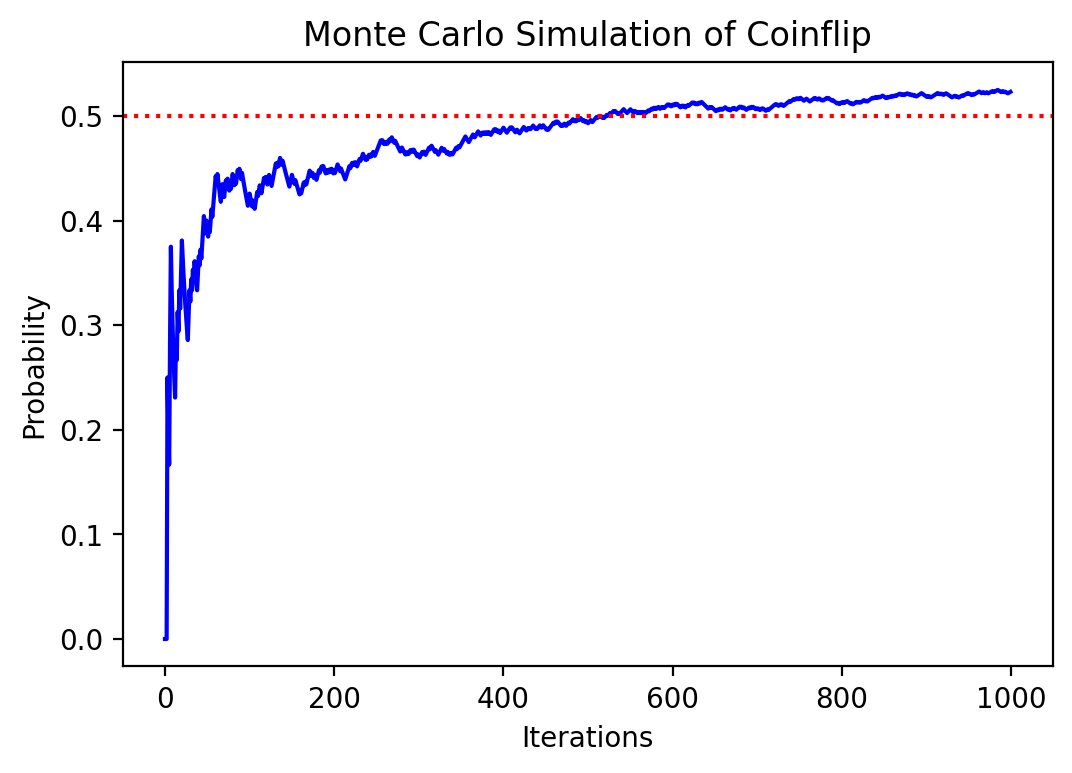

In [6]:
#plotting results
results = monteCarlo(1000)
plt.figure(dpi=200)
plt.plot(results,color='b',linestyle='-')
plt.axhline(y=0.5,color='r',linestyle='dotted')
plt.xlabel("Iterations")
plt.ylabel("Probability")
plt.title("Monte Carlo Simulation of Coinflip")
plt.show()

# Estimating Pi

In [7]:
import turtle
import math

## Plotting Shapes

In [6]:
myPen = turtle.Turtle()
myPen.hideturtle()
myPen.speed(0)
r = 100 #radius of circle (and half side length of square because circle inscribed)

#Square with side length 2*r
myPen.up()
myPen.setposition(-r,-r)
myPen.down()
myPen.fd(2*r)
myPen.left(90)
myPen.fd(2*r)
myPen.left(90)
myPen.fd(2*r)
myPen.left(90)
myPen.fd(2*r)
myPen.left(90)

#Cirlce with radius, r
myPen.up()
myPen.setposition(0,-r)
myPen.down()
myPen.circle(r)


## Main Function

In [7]:
def monteCarlo(n):
    in_circle = 0
    out_circle = 0
    pi_values,error = [],[]
    for i in range(n):
        #generating random coordinate point inside square
        x = random.randrange(-100,100)
        y = random.randrange(-100,100)

        #if less than radius away from center --> is in circle --> plot black point
        if(x**2+y**2>100**2):
            myPen.color("black")
            myPen.up()
            myPen.goto(x,y)
            myPen.down()
            myPen.dot()
            out_circle += 1
        
        #else plot red point
        else:
            myPen.color("red")
            myPen.up()
            myPen.goto(x,y)
            myPen.down()
            myPen.dot()
            in_circle += 1

        #deriving value of pi from area estimates
        square_area_estimate = in_circle+out_circle
        circle_area_estimate = in_circle
        pi = 4.0 * circle_area_estimate / square_area_estimate
        pi_values.append(pi)

        #calculating difference between estimate and actual value
        error.append(math.pi - pi)

    return {
        'pi_values':pi_values,
        'error':error
           }
            


In [8]:
results = monteCarlo(1000)

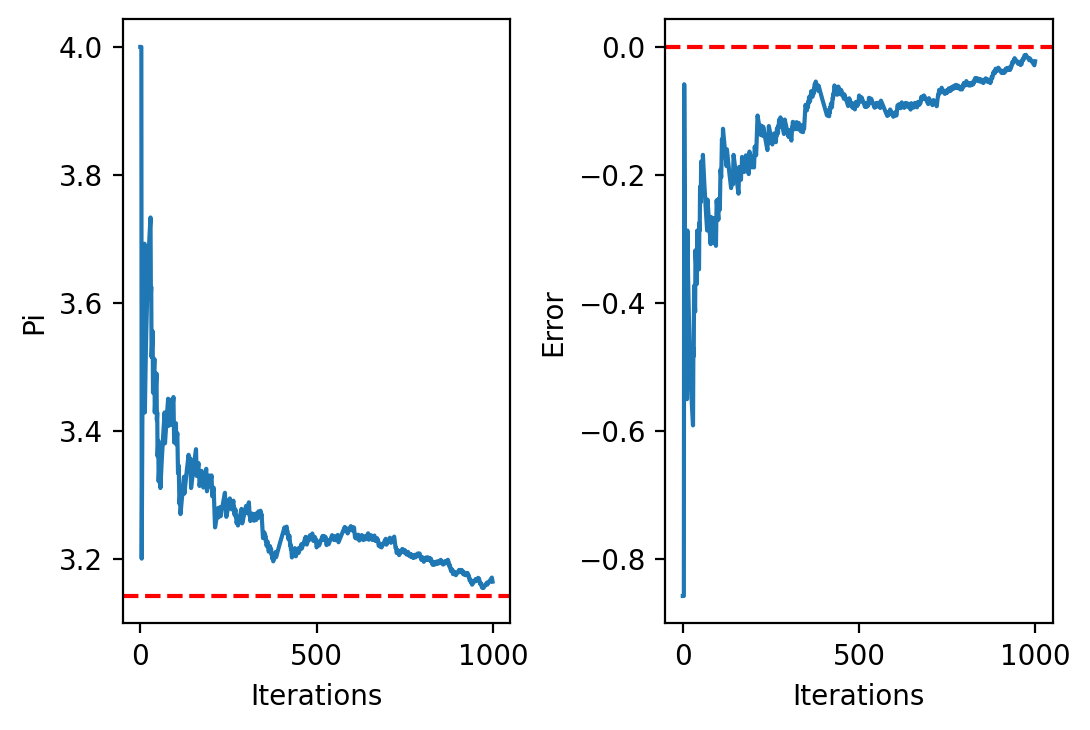

In [9]:
#plotting results

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.dpi = 200
ax1.axhline(y=math.pi,color='red',linestyle='dashed')
ax1.plot(results['pi_values'])
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Pi')
ax2.axhline(y=0,color='red',linestyle='dashed')
ax2.plot(results['error'])
ax2.set_xlabel('Iterations')
ax2.set_ylabel('Error')
plt.subplots_adjust(wspace = 0.4)
plt.show()

# Monty Hall Problem

In [11]:
def monteCarlo(n):
    doors = ['failure','failure','success']
    switch_probs, stick_probs = [],[]

    switch_wins, stick_wins = 0,0 #wins with each strategy
    for i in range(n):
        random.shuffle(doors) 
        choice = random.randint(0,2) #randomly choose from doors
        
        if doors[choice] != 'success':
            switch_wins += 1 #if choice was wrong then switch on next move wins
        else:
            stick_wins += 1 #if choice was right then stick on next move wins
        
        rounds = i + 1
        switch_probs.append(switch_wins/rounds)
        stick_probs.append(stick_wins/rounds)
    
    return {
        'stick_probs':stick_probs,
        'switch_probs':switch_probs
           }

In [12]:
results = monteCarlo(1000)
switch_probs = results['switch_probs']
stick_probs = results['stick_probs']

Text(-10, 10, '0.653')

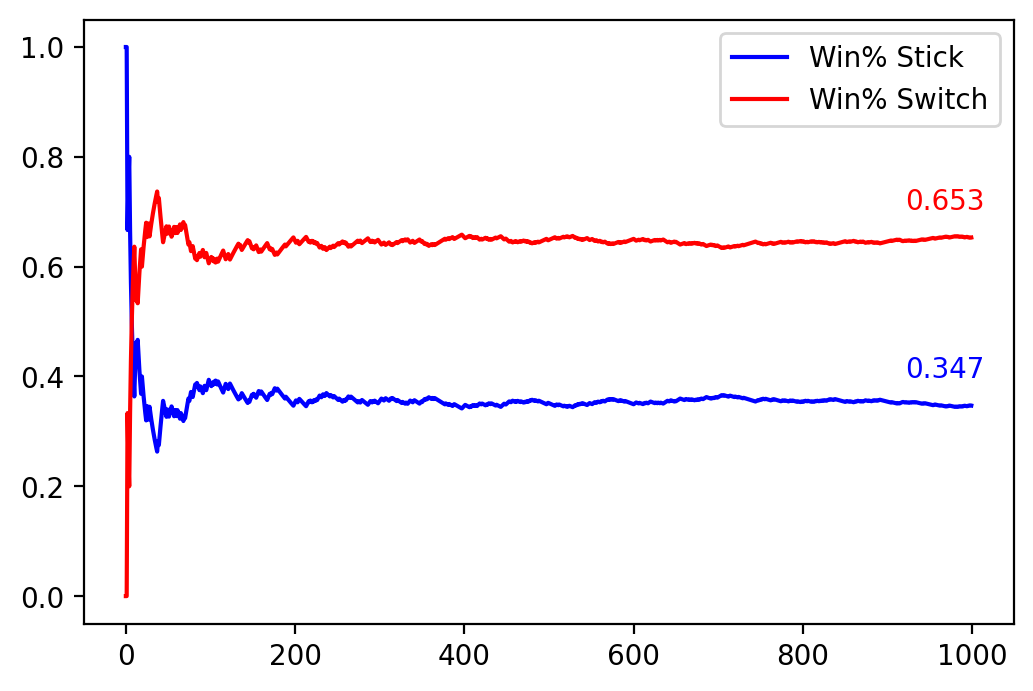

In [13]:
#plotting results
plt.figure(dpi=200)
plt.plot(stick_probs,'blue',label='Win% Stick')
plt.plot(switch_probs,'red',label='Win% Switch')
plt.legend()
plt.annotate(str(stick_probs[-1]),(1000,stick_probs[-1]),textcoords="offset points",xytext=(-10,10), ha='center',color='blue')
plt.annotate(str(switch_probs[-1]),(1000,switch_probs[-1]),textcoords="offset points",xytext=(-10,10), ha='center',color='red')